In [1]:
import qiskit
import numpy as np

In [2]:
r0 = qiskit.QuantumRegister(10)
r1 = qiskit.QuantumRegister(10)
r2 = qiskit.QuantumRegister(11)
anc = qiskit.QuantumRegister(1)
creg = qiskit.ClassicalRegister(31)

circuit = qiskit.QuantumCircuit(r0, r1, r2, anc, creg)

circuit.h(r0)
circuit.h(r1)
circuit.h(r2)
    
circuit.x(anc[0])
    
#circuit.barrier()

phiunit = 2. * 2. * np.pi / (2 ** r2.size)

for source in [r0, r1]:
    for isrc, src in enumerate(source):
        for itrg, trg in enumerate(r2):
            #circuit.mcrz(phiunit * (2 ** isrc) * (2 ** itrg), [src, trg], anc[0])
            #circuit.crz(phiunit * (2 ** isrc) * (2 ** itrg), trg, anc[0])
            circuit.rz(0.5 * phiunit * (2 ** isrc) * (2 ** itrg), anc[0])
            circuit.mcx([src, trg], anc[0])
            circuit.rz(-0.5 * phiunit * (2 ** isrc) * (2 ** itrg), anc[0])
            circuit.mcx([src, trg], anc[0])
            
iqft = qiskit.circuit.library.basis_change.qft.QFT(r2.size, inverse=True, do_swaps=False)
circuit.compose(iqft, r2, inplace=True)
for iq in range(r2.size // 2):
    circuit.swap(r2[iq], r2[-iq - 1])

#circuit.barrier()
for iq, q in enumerate(circuit.qubits[:-1]):
    circuit.measure(q, creg[iq])

#circuit.draw('mpl', style={'dpi': '300'}, fold=70, initial_state=True)

In [3]:
backend = qiskit.Aer.get_backend('qasm_simulator', )

circuit = qiskit.transpile(circuit, backend=backend)

qobj = qiskit.compiler.assemble(circuit, shots=10000)

job = backend.run(qobj)#, backend_options={'method': 'matrix_product_state'})
job.wait_for_final_state()
print(job.status())

JobStatus.DONE


In [4]:
result = job.result()
result.data()

{'counts': {'0x101050ed': 1,
  '0x101054ec': 1,
  '0x1012506d': 1,
  '0x1012546c': 1,
  '0x1012905d': 1,
  '0x102010fe': 1,
  '0x1020f8c4': 1,
  '0x10220481': 1,
  '0x10325c6c': 1,
  '0x10407ce5': 1,
  '0x104148b2': 1,
  '0x1041ec89': 1,
  '0x1042e44b': 1,
  '0x105154b0': 1,
  '0x105168ab': 1,
  '0x1053602d': 1,
  '0x1060b0da': 1,
  '0x1062f848': 1,
  '0x107088e5': 1,
  '0x10717ca8': 1,
  '0x10721c80': 1,
  '0x10729063': 1,
  '0x108038fa': 1,
  '0x10820088': 1,
  '0x10834c35': 1,
  '0x10a030fe': 1,
  '0x10a25475': 1,
  '0x10b048f9': 1,
  '0x10b3383d': 1,
  '0x10c1c89a': 1,
  '0x10c34c39': 1,
  '0x10d2d458': 1,
  '0x10e02d03': 1,
  '0x10e124c5': 1,
  '0x10e158b8': 1,
  '0x10e3403e': 1,
  '0x10f0f8d1': 1,
  '0x10f168b5': 1,
  '0x11030050': 1,
  '0x1110d4dc': 1,
  '0x11117cb2': 1,
  '0x1111bca2': 1,
  '0x112174b5': 1,
  '0x112188b0': 1,
  '0x1122208a': 1,
  '0x11228c6f': 1,
  '0x11234c3f': 1,
  '0x1123f814': 1,
  '0x11240411': 1,
  '0x1130e4da': 1,
  '0x11343805': 1,
  '0x1141b8a6': 1,
  

In [13]:
counts = result.get_counts(circuit)

for ip, (key, value) in enumerate(counts.items()):
    print('%d = %d + %d' % (int(key[:11], 2), int(key[11:21], 2), int(key[21:], 2)), value)
    if ip == 10:
        break

257 = 20 + 237 1
257 = 21 + 236 1
257 = 148 + 109 1
257 = 149 + 108 1
257 = 164 + 93 1
258 = 4 + 254 1
258 = 62 + 196 1
258 = 129 + 129 1
259 = 151 + 108 1
260 = 31 + 229 1
260 = 82 + 178 1


In [12]:
for item in list(cnts.items())[10]:
    print(item)

260 = 82 + 178
1


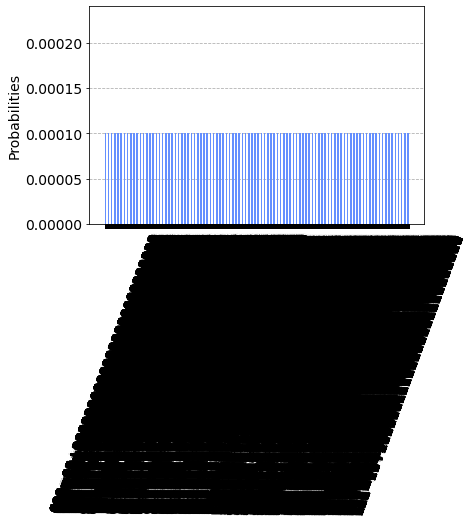

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
qiskit.visualization.plot_histogram(cnts, bar_labels=False, ax=ax)

In [ ]:
plt.xticks(rotation=90)

(array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.946e+03, 9.947e+03,
        9.948e+03]),
 [Text(0.0, 0, '000=00+01011000000000010000010101'),
  Text(1.0, 0, '000=00+10000000000010110000010101'),
  Text(2.0, 0, '000=00+10000000000011100000010010'),
  Text(3.0, 0, '000=00+10000100000000100000011111'),
  Text(4.0, 0, '000=00+10011000000111010000001001'),
  Text(5.0, 0, '000=00+10011100000000100000100101'),
  Text(6.0, 0, '000=00+10110000000110100000010010'),
  Text(7.0, 0, '000=00+10111100001000010000001110'),
  Text(8.0, 0, '000=00+11000100000110010000011000'),
  Text(9.0, 0, '000=00+11001100000001000000101111'),
  Text(10.0, 0, '000=00+11100100001100110000000110'),
  Text(11.0, 0, '000=00+11101100000011110000101100'),
  Text(12.0, 0, '000=00+11110000001100000000001100'),
  Text(13.0, 0, '000=00+11111100001010100000010101'),
  Text(14.0, 0, '000=01+00000000000101110000101001'),
  Text(15.0, 0, '000=01+00000000001101110000001001'),
  Text(16.0, 0, '000=01+00000000001110010000000111'),
  T